In [1]:
import os 
import sys 

functionPath = os.path.join( '..', '..', 'text_mining')
sys.path.append( functionPath )

import get_vectors as gv 

In [2]:
tfidf_vector = gv.get_tf_idf( '../../text_mining', '../../src_txt' )
svd_vector = gv.get_SVD_vectors( '../../text_mining', '../../src_txt', 100 )

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\PuSung\AppData\Local\Temp\jieba.cache
Loading model cost 0.730 seconds.
Prefix dict has been built successfully.


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn import metrics

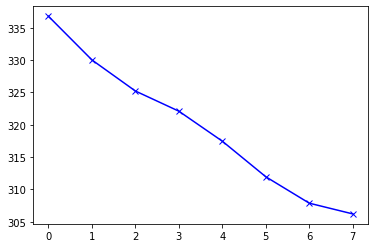

In [4]:
n_clusters = 10
cost = []
for i in range( 2, n_clusters ) : 
    kmeans = KMeans( n_clusters = i )
    kmeans.fit( svd_vector )
    cost.append( kmeans.inertia_ )
plt.plot( cost, 'bx-' )


In [5]:
final_n_clusters = 6
final_kmeans = KMeans( n_clusters = final_n_clusters )
final_kmeans.fit( svd_vector )

KMeans(n_clusters=6)

In [10]:
final_kmeans.labels_
dc = {}
for i in range( len( final_kmeans.labels_ ) ):
    try :
        dc[final_kmeans.labels_[i]].append( i )
    except :
        dc[final_kmeans.labels_[i]] = [i]